In [1]:
import pandas as pd

In [2]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 541.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 32.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.9 MB/s eta 0:00:00


In [3]:
import geopandas as gpd

In [4]:
weibo = pd.read_csv("UTSEUS-shanghai-weibo-2012.csv",on_bad_lines='skip')

In [5]:
weibo.gender.count()

518456

In [11]:
weibo.gender.value_counts().apply(lambda x : x/weibo.gender.count())

gender
f    0.701886
m    0.298114
Name: count, dtype: float64

In [12]:
weibo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518456 entries, 0 to 518455
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   status                       518456 non-null  object 
 1   weibo_user_id                518456 non-null  int64  
 2   created_at                   518456 non-null  object 
 3   weibo_user_id.1              518456 non-null  int64  
 4   gender                       518456 non-null  object 
 5   friends_count                518456 non-null  int64  
 6   followers_count              518456 non-null  int64  
 7   status_count                 518456 non-null  int64  
 8   title                        518456 non-null  object 
 9   latitude                     518456 non-null  float64
 10  longitude                    518456 non-null  float64
 11  category_name                504688 non-null  object 
 12  category_en_name             504688 non-null  object 
 13 

In [8]:
geoweibo = gpd.GeoDataFrame(weibo,geometry=gpd.points_from_xy(weibo.longitude,weibo.latitude,crs=4326))

<Axes: >

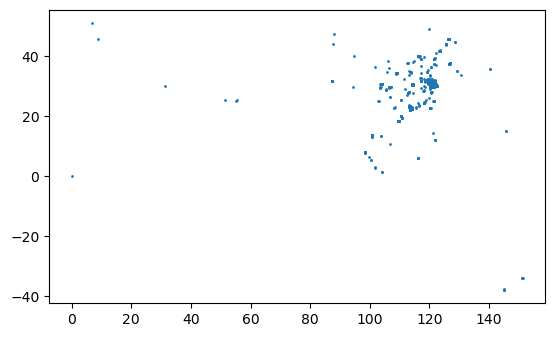

In [10]:
geoweibo.plot(markersize=1)

In [13]:
weibo[['latitude','longitude']]

,latitude,longitude
0,31.228840,121.480080
1,38.964630,121.544250
2,22.190491,113.543327
3,31.168315,121.418148
4,31.202400,121.558320
...,...,...
518451,31.334908,121.449384
518452,31.334170,121.423210
518453,31.316284,121.535270
518454,31.342190,121.492430


In [14]:
shanghai = gpd.read_file('街道乡镇.shp')

<Axes: >

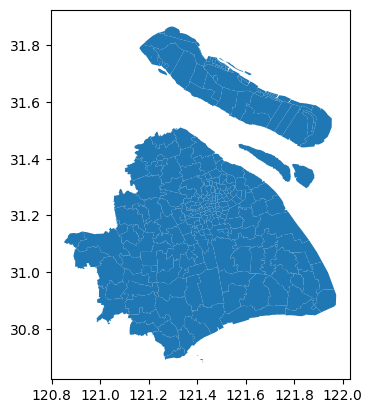

In [15]:
shanghai.plot()

In [21]:
# encoding:utf-8
import requests 

# 接口地址
url = "https://api.map.baidu.com/geocoding/v3"

# 此处填写你在控制台-应用管理-创建应用后获取的AK
ak = "VsLUeUTivYLd0FQdSs9B15liPGL9SsBm"

params = {
    "address":    "上海大学南陈路333",
    "output":    "json",
    "ak":       ak,

}

response = requests.get(url=url, params=params)
if response:
    print(response.json())

{'status': 0, 'result': {'location': {'lng': 121.40221497394768, 'lat': 31.32005764915826}, 'precise': 0, 'confidence': 50, 'comprehension': 0, 'level': '商圈'}}


In [23]:
shu_lon = response.json()['result']['location']['lng']
shu_lat = response.json()['result']['location']['lat']

In [24]:
print(f'{shu_lon} {shu_lat}')

121.40221497394768 31.32005764915826


In [25]:
from shapely.geometry import *

In [32]:
shu_point = Point(shu_lon,shu_lat)

In [33]:
points = gpd.GeoSeries([shu_point])

In [36]:
points_gdf = gpd.GeoDataFrame({'geometry':points})

In [43]:
points_gdf = points_gdf.set_crs(4326)

In [44]:
type(points)

geopandas.geoseries.GeoSeries

In [47]:
gpd.overlay(points_gdf,shanghai).NAME

0    大场镇
Name: NAME, dtype: object

<Axes: >

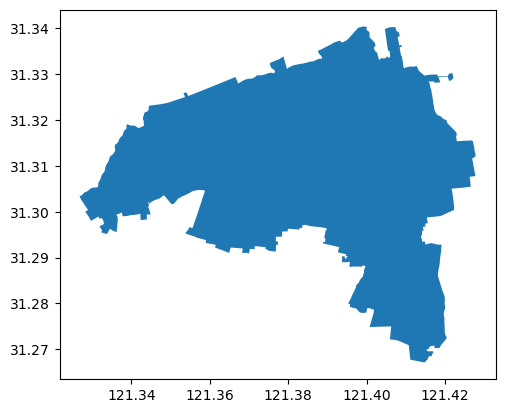

In [50]:
shanghai[shanghai.NAME == '大场镇'].plot()

In [51]:
gpd.overlay(geoweibo,shanghai[shanghai.NAME == '大场镇'])

,status,weibo_user_id,created_at,weibo_user_id.1,gender,friends_count,followers_count,status_count,title,latitude,longitude,category_name,category_en_name,total_checkin_count,distinct_user_checkin_count,tip_count,NAME,TYPE,geometry
0,曼齐尼有点被打蒙了的感觉 我在这里：http://t.cn/zj55i3k,2104973794,2012-12-09 21:59:33+08,2104973794,m,178,293,1773,大地数字影院(弘基店),31.315300,121.386064,电影院,Cinema,669.0,463.0,525.0,大场镇,2,POINT Z (121.38606 31.31530 0.00000)
1,人与车相媲美，要人还是车呢？[睡觉][花心][疑问] @阿咪罗罗3 @两色风景嘎 @照片这样...,3147859525,2012-12-09 22:09:50+08,3147859525,f,101,36,45,古浪路真北路,31.281230,121.399920,公交车站,Bus Station,36.0,46.0,36.0,大场镇,2,POINT Z (121.39992 31.28123 0.00000)
2,We are the champions 我在这里：http://t.cn/zl1L13R,2607738795,2012-12-09 22:31:27+08,2607738795,m,41,28,37,上大宝山校区,31.314330,121.389430,高等院校,Institutions of higher learning,2271.0,1374.0,988.0,大场镇,2,POINT Z (121.38943 31.31433 0.00000)
3,最近人格都快分裂了，[怒]各种会议活动项目转换，殿下恨不得来几个分身或者每天48小时了，你说...,2454056712,2012-12-09 22:39:47+08,2454056712,m,255,183,522,上海大学(宝山区校区)南区宿舍,31.310029,121.388531,校园生活,Campus Life,1052.0,452.0,528.0,大场镇,2,POINT Z (121.38853 31.31003 0.00000)
4,刚从外面回来…发现腿麻了，冻麻了，这天真是……@SCTT_柒月 @Arsenal蒸汽机车开啊...,2814930685,2012-12-09 22:45:51+08,2814930685,f,73,44,19,上大宝山校区,31.314330,121.389430,高等院校,Institutions of higher learning,2271.0,1374.0,988.0,大场镇,2,POINT Z (121.38943 31.31433 0.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10429,去七辛路展厅！只能走一段地面后！外地牌照伤不起～～～[浮云][浮云][浮云]必须淡定！ 我在...,2081173275,2013-01-07 09:14:33+08,2081173275,f,460,1405,5392,上海平治汽车贸易有限公司,31.292937,121.408609,NaN,NaN,NaN,NaN,NaN,大场镇,2,POINT Z (121.40861 31.29294 0.00000)
10430,嘟嘟又闹了一晚，不好好睡觉折腾我，不知是刚添加辅食不适应还是要长牙了不舒服，整晚最长睡不到2...,1843330135,2013-01-07 09:25:07+08,1843330135,f,193,328,1129,玉华苑(南二门),31.283670,121.408850,大门,Door,327.0,62.0,300.0,大场镇,2,POINT Z (121.40885 31.28367 0.00000)
10431,[衰] 我在这里:http://t.cn/zjXH0Qk,2001207145,2013-01-07 09:32:02+08,2001207145,m,126,1887,527,环镇北路,31.307970,121.407900,公交车站,Bus Station,144.0,43.0,142.0,大场镇,2,POINT Z (121.40790 31.30797 0.00000)
10432,做什么事都要全力以赴，脚踏实地，不否认有撞大运的，但凭什么就会是自己啊？！过线又怎样，跟没过...,2049441851,2013-01-07 09:34:04+08,2049441851,m,28,25,27,当代高邸,31.316616,121.384747,未知分类,Unknown Classification,531.0,124.0,317.0,大场镇,2,POINT Z (121.38475 31.31662 0.00000)


In [52]:
weibo_dachang = gpd.overlay(geoweibo,shanghai[shanghai.NAME == '大场镇'])

<Axes: >

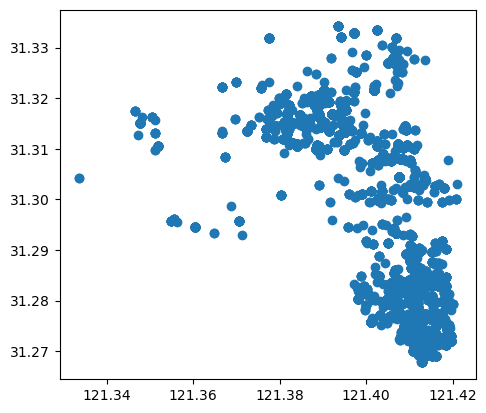

In [53]:
weibo_dachang.plot()

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Axes: >

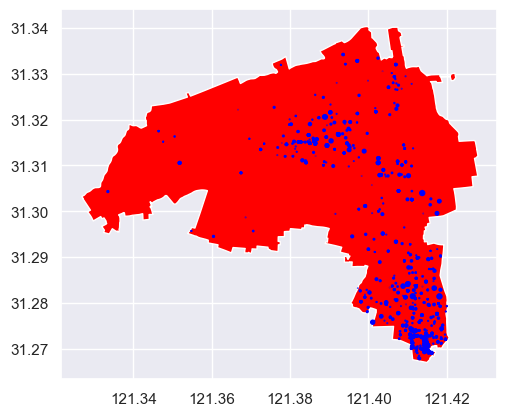

In [96]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

shanghai[shanghai.NAME == '大场镇'].plot(color='red',ax=ax)
weibo_dachang.plot(markersize=(weibo_dachang.status_count - weibo_dachang.status_count.mean())/weibo_dachang.status_count.std()
                   ,color='blue',ax=ax,legend=True)

In [78]:
geoweibo.describe()

,weibo_user_id,weibo_user_id.1,friends_count,followers_count,status_count,latitude,longitude,total_checkin_count,distinct_user_checkin_count,tip_count
count,5.184560e+05,5.184560e+05,518456.000000,518456.000000,518456.000000,518456.000000,518456.000000,504688.000000,504688.000000,504688.000000
mean,1.998617e+09,1.998617e+09,242.522191,630.637476,1739.806882,31.260290,121.420042,1822.953637,1372.027153,471.072508
std,4.295179e+08,4.295179e+08,234.069372,5116.064167,2572.361383,0.642148,1.098204,4811.669753,3862.595696,557.403807
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-37.899970,0.000000,0.000000,0.000000,0.000000
25%,1.758616e+09,1.758616e+09,107.000000,113.000000,357.000000,31.199510,121.426239,142.000000,71.000000,112.000000
50%,1.909010e+09,1.909010e+09,185.000000,221.000000,952.000000,31.230019,121.468800,469.000000,281.000000,288.000000
75%,2.244541e+09,2.244541e+09,300.000000,441.000000,2140.000000,31.270690,121.513829,1560.000000,1161.000000,613.000000
max,3.230455e+09,3.230455e+09,3000.000000,832916.000000,93840.000000,50.931756,151.206573,375809.000000,251752.000000,6081.000000


In [79]:
geoweibo.status_count.describe()

count    518456.000000
mean       1739.806882
std        2572.361383
min           0.000000
25%         357.000000
50%         952.000000
75%        2140.000000
max       93840.000000
Name: status_count, dtype: float64

<Axes: ylabel='Frequency'>

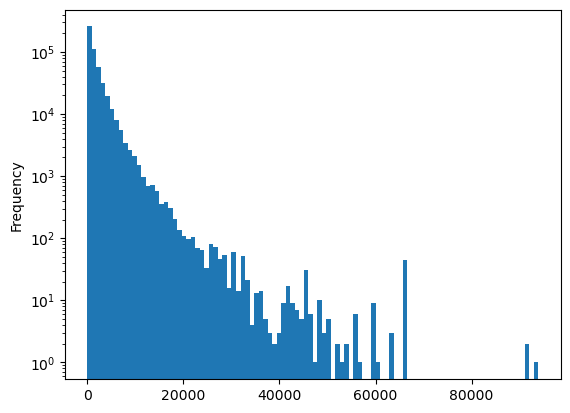

In [83]:
geoweibo.status_count.plot(kind='hist',bins=100,logy=True)

In [85]:
import seaborn as sns
sns.set()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

<Axes: xlabel='status_count', ylabel='Count'>

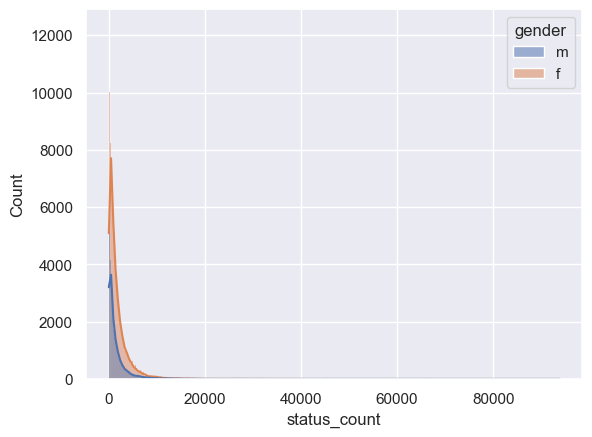

In [88]:
sns.histplot(data=geoweibo,kde=True,hue='gender',x='status_count')

In [97]:
weibo_dachang.gender.value_counts()/weibo_dachang.gender.count()

gender
f    0.687081
m    0.312919
Name: count, dtype: float64

In [98]:
weibo_dachang.gender.value_counts().apply(lambda x: x/weibo_dachang.gender.count())

gender
f    0.687081
m    0.312919
Name: count, dtype: float64

In [30]:
#shanghai.area.sum()

In [31]:
#shanghai.to_crs(4576).area.sum()